<a href="https://colab.research.google.com/github/MateoAV/MetNumUN2024II/blob/main/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic "setuptools < 65"

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 41.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a,b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) != len(B):
      raise Exception("Size of matrices not compatible")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a,b)

Exception: Size of matrices not compatible

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[1, 2],
     [3, 4],
     [5, 6]]

b = [[7, 8, 9],
     [10, 11, 12]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(a, b)

CPU times: user 24 µs, sys: 4 µs, total: 28 µs
Wall time: 31.9 µs


[[27, 30, 33], [61, 68, 75], [95, 106, 117]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.8694334843492575

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9663977653600373, 0.5188693254093731, 0.038062824732297496],
 [0.5638028413259718, 0.9472055990749902, 0.7109122356085102]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
tot = 0
for i in range(11):
  a, b = random_matrix(600, 100), random_matrix(100, 600)
  st = time.perf_counter()
  matmul(a, b)
  en = time.perf_counter()
  if i > 0:
    tot += en-st
print(tot/10)

9.269862130099956


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

df = pd.DataFrame({"Lang": ["Python"], "Avg Time": [tot/10]})

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time
import numpy as np
tot = 0
for i in range(11):
  a, b = np.array(random_matrix(600, 100)), np.array(random_matrix(100, 600))
  st = time.perf_counter()
  a @ b
  en = time.perf_counter()
  if i > 0:
    tot += en-st
print(tot/10)

0.003775932100143109


In [ ]:
df = pd.concat([df, pd.DataFrame({"Lang": ["Numpy"], "Avg Time": [tot/10]})], ignore_index=True)
df

,Lang,Avg Time
0,Python,9.269862
1,Numpy,0.003776


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.11 s, sys: 13 ms, total: 9.12 s
Wall time: 9.2 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 16.4 ms, sys: 0 ns, total: 16.4 ms
Wall time: 20 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 193 µs, sys: 0 ns, total: 193 µs
Wall time: 198 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
a, b = np.array([[3.0, 4.0], [3.0, 4.0]]), np.array([[3.0, 4.0], [3.0, 4.0]])

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matmul(a, b, c)
    double precision, intent(in) :: a(2,2), b(2,2)
    double precision, intent(out) :: c(2,2)
    integer :: i, j, k
    do i = 1, 2
        do j = 1, 2
            c(i,j) = 0.0
            do k = 1, 2
                c(i,j) = c(i,j) + a(i,k) * b(k,j)
            end do
        end do
    end do
end subroutine matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
matmul(a, b)

CPU times: user 1.43 ms, sys: 5 µs, total: 1.44 ms
Wall time: 1.34 ms


array([[21., 28.],
       [21., 28.]])

In [ ]:
%%time
a@b

CPU times: user 61 µs, sys: 0 ns, total: 61 µs
Wall time: 66 µs


array([[21., 28.],
       [21., 28.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matrix_multiply_n_m(a, b, c, n, m, p)
    implicit none
    integer, intent(in) :: n, m, p
    double precision, intent(in) :: a(n,m), b(m,p)
    double precision, intent(out) :: c(n,p)
    integer :: i, j, k

    do i = 1, n
        do j = 1, p
            c(i,j) = 0.0d0
            do k = 1, m
                c(i,j) = c(i,j) + a(i,k) * b(k,j)
            end do
        end do
    end do
end subroutine matrix_multiply_n_m

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
a, b = np.array(random_matrix(600, 100)), np.array(random_matrix(100, 600))

In [ ]:
%%time
matrix_multiply_n_m(a, b, 600, 100, 600)

CPU times: user 49.7 ms, sys: 3.01 ms, total: 52.7 ms
Wall time: 53.4 ms


array([[25.86884385, 25.48551561, 28.53703661, ..., 27.09550971,
        24.33435538, 27.47422562],
       [24.27397948, 22.20496778, 25.6561203 , ..., 24.55132694,
        24.64431963, 25.02175358],
       [23.27092022, 23.62857549, 27.16596784, ..., 21.99960403,
        19.69927554, 25.38170511],
       ...,
       [25.14619918, 25.06443759, 25.16906938, ..., 25.5342686 ,
        23.54126926, 27.21844011],
       [25.87238019, 25.67168201, 26.93848247, ..., 27.15782002,
        25.06898689, 27.71914467],
       [21.8776036 , 20.49419235, 24.1526431 , ..., 22.28176373,
        21.33544582, 23.83890543]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time
import numpy as np
tot = 0
for i in range(11):
  a, b = np.array(random_matrix(600, 100)), np.array(random_matrix(100, 600))
  st = time.perf_counter()
  matrix_multiply_n_m(a, b, 600, 100, 600)
  en = time.perf_counter()
  if i > 0:
    tot += en-st
print(tot/10)

0.042318234299909815


In [ ]:
df = pd.concat([df, pd.DataFrame({"Lang": ["Fortran Magic"], "Avg Time": [tot/10]})], ignore_index=True)

In [ ]:
df

,Lang,Avg Time
0,Python,9.269862
1,Numpy,0.003776
2,Fortran Magic,0.042318


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file fortran_matrix_multiply.f90
program matrix_multiplication
  integer :: n = 600, m = 100, p = 600
  double precision :: a(600,100), b(100,600), c(600,600)

  integer :: i, j, k

  real :: tot, start, end
  integer :: r

  do i = 1, n
    do j = 1, m
      a(i,j) = (i + j) * 0.5
      b(i,j) = (i - j) * 0.5
    end do
  end do

  tot = 0.0
  do r = 1, 10
    call cpu_time(start)
    c = matmul(a, b)
    call cpu_time(end)
    tot = tot + (end-start)
  end do

  tot = tot/10.0

  PRINT *,tot

end program matrix_multiplication

Overwriting fortran_matrix_multiply.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran fortran_matrix_multiply.f90 -o fortran_matrix_multiply

In [ ]:
fortran_avg_time = !./fortran_matrix_multiply
print(fortran_avg_time)
fortran_avg_time = eval(fortran_avg_time[-1].strip())
print(fortran_avg_time)

['   5.69230085E-03']
0.00569230085


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
df = pd.concat([df, pd.DataFrame({"Lang": ["Fortran"], "Avg Time": [fortran_avg_time]})], ignore_index=True)
df

,Lang,Avg Time
0,Python,9.269862
1,Numpy,0.003776
2,Fortran Magic,0.042318
3,Fortran,0.005692


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file c_matrix_multiply.c
#include <stdlib.h>
#include <stdio.h>
#include <time.h>

int** buildMatrix(int n, int m){
    int **arr = (int **)malloc(n * sizeof(int *));
    for(int i = 0; i < n; i++){
        arr[i] = (int *)malloc(m * sizeof(int));
    }
    return arr;
}

void freeMatrix(int **matrix, int n) {
    for (int i = 0; i < n; i++) {
        free(matrix[i]);
    }
    free(matrix);
}

int main(){
    clock_t start, end;
    double cpu_time_used;
    int **a = buildMatrix(600, 100);
    int **b = buildMatrix(100, 600);
    int **c = buildMatrix(600, 600);

    for(int i = 0; i < 600; i++){
        for(int j = 0; j < 100; j++){
            a[i][j] = i+j;
            b[j][i] = i-j;
        }
    }
    for(int i = 0; i < 600; i++)
        for(int j = 0; j < 600; j++)
            c[i][j] = 0;

    start = clock();
    for(int r = 0; r < 10; r++)
      for(int i = 0; i < 600; i++)
          for(int j = 0; j < 600; j++)
              for(int k = 0; k < 100; k++)
                  c[i][j] += a[i][k] * b[k][j];
    end = clock();
    cpu_time_used = ((double) (end - start)) / CLOCKS_PER_SEC;
    cpu_time_used /= 10;
    printf("%f\n",cpu_time_used);

    freeMatrix(a, 600);
    freeMatrix(b, 100);
    freeMatrix(c, 600);
    return 0;
}

Overwriting c_matrix_multiply.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc c_matrix_multiply.c -o c_matrix_multiply

In [ ]:
c_avg_time = !./c_matrix_multiply
print(c_avg_time)
c_avg_time = eval(c_avg_time[-1].strip())
print(c_avg_time)

['0.210809']
0.210809


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
df = pd.concat([df, pd.DataFrame({"Lang": ["C"], "Avg Time": [c_avg_time]})], ignore_index=True)
df

,Lang,Avg Time
0,Python,9.269862
1,Numpy,0.003776
2,Fortran Magic,0.042318
3,Fortran,0.005692
4,C,0.210809


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file cpp_matrix_multiply.cpp
#include<bits/stdc++.h>
#include <chrono>

#define N 600
#define M 100
#define P 600

using namespace std;



int main(){
    int a[N][M], b[M][P], c[N][P];
    memset(c, 0, sizeof(c));

    for(int i = 0; i < N; i++){
        for(int j = 0; j < M; j++){
            a[i][j] = i+j;
            b[j][i] = i-j;
        }
    }

    auto start = chrono::high_resolution_clock::now();
    for(int r = 0; r < 10; r++)
      for(int i = 0; i < N; i++)
        for(int j = 0; j < P; j++)
          for(int k = 0; k < M; k++)
            c[i][j] += a[i][k] * b[k][j];
    auto end = chrono::high_resolution_clock::now();
    chrono::duration<double> dur = end-start;

    printf("%f", dur.count()/10);

    return 0;
}

Writing cpp_matrix_multiply.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ cpp_matrix_multiply.cpp -o cpp_matrix_multiply -std=c++20 -O3 -march=native -mtune=native -flto -finline-functions -funroll-loops

In [ ]:
cpp_avg_time = !./cpp_matrix_multiply
print(cpp_avg_time)
cpp_avg_time = eval(cpp_avg_time[-1].strip())
print(cpp_avg_time)

['0.004419']
0.004419


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
df = pd.concat([df, pd.DataFrame({"Lang": ["C++"], "Avg Time": [cpp_avg_time]})], ignore_index=True)
df

,Lang,Avg Time
0,Python,9.269862
1,Numpy,0.003776
2,Fortran Magic,0.042318
3,Fortran,0.005692
4,C,0.210809
5,C++,0.004419


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file MatrixMultiplication.java

public class MatrixMultiplication {
    public static void main(String[] args) {
        int[][] A = new int[600][100];
        int[][] B = new int[100][600];
        int[][] C = new int[600][600]; // Resultado de AxB

        // Inicialización de matrices con valores de ejemplo
        for(int i = 0; i < 600; i++) {
            for(int j = 0; j < 100; j++) {
                A[i][j] = 1; // Valor ejemplo para A
            }
        }

        for(int i = 0; i < 100; i++) {
            for(int j = 0; j < 600; j++) {
                B[i][j] = 2; // Valor ejemplo para B
            }
        }

        long startTime = System.nanoTime();

        // Realizar la multiplicación 10 veces
        for(int times = 0; times < 10; times++) {
            for(int i = 0; i < 600; i++) {
                for(int j = 0; j < 600; j++) {
                    C[i][j] = 0;
                    for(int k = 0; k < 100; k++) {
                        C[i][j] += A[i][k] * B[k][j];
                    }
                }
            }
        }

        long endTime = System.nanoTime();
        long duration = (endTime - startTime) / 10; // Tiempo promedio por multiplicación

        System.out.println("Tiempo promedio de ejecución: " + duration + " nanosegundos");
    }
}

Writing MatrixMultiplication.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatrixMultiplication.java
!java MatrixMultiplication

Tiempo promedio de ejecución: 88977310 nanosegundos


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
java_avg_time = !java MatrixMultiplication
print(java_avg_time)
java_avg_time = eval(java_avg_time[-1].split()[4])
print(java_avg_time)

['Tiempo promedio de ejecución: 84428382 nanosegundos']
84428382


In [ ]:
java_avg_time = java_avg_time / 1e9
df = pd.concat([df, pd.DataFrame({"Lang": ["Java"], "Avg Time": [java_avg_time]})], ignore_index=True)
df

,Lang,Avg Time
0,Python,9.269862
1,Numpy,0.003776
2,Fortran Magic,0.042318
3,Fortran,0.005692
4,C,0.210809
5,C++,0.004419
6,Java,0.084428


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix.js
const N = 600;
const M = 100;
const P = 600;

function initializeMatrix(rows, cols) {
    const matrix = new Array(rows);
    for (let i = 0; i < rows; i++) {
        matrix[i] = new Array(cols);
    }
    return matrix;
}

function matrixMultiply(a, b, c) {
    for (let i = 0; i < N; i++) {
        for (let j = 0; j < P; j++) {
            c[i][j] = 0;
            for (let k = 0; k < M; k++) {
                c[i][j] += a[i][k] * b[k][j];
            }
        }
    }
}

const a = initializeMatrix(N, M);
const b = initializeMatrix(M, P);
const c = initializeMatrix(N, P);

for (let i = 0; i < N; i++) {
    for (let j = 0; j < M; j++) {
        a[i][j] = i + j;
        b[j][i] = i - j;
    }
}

const start = Date.now();
for (let r = 0; r < 10; r++) {
    matrixMultiply(a, b, c);
}
const end = Date.now();
const duration = (end - start) / 1000;

console.log(duration / 10);

Writing matrix.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import re
js_avg_time = !node matrix.js
js_avg_time = float(re.sub(r'\x1b\[\d+m', '', js_avg_time[0]))
print(js_avg_time)

0.3101


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
import pandas as pd
import re

# Assuming js_avg_time is defined from previous code cell
df = pd.concat([df, pd.DataFrame({"Lang": ["Javascript"], "Avg Time": [js_avg_time]})], ignore_index=True)
df

,Lang,Avg Time
0,Python,9.269862
1,Numpy,0.003776
2,Fortran Magic,0.042318
3,Fortran,0.005692
4,C,0.210809
5,C++,0.004419
6,Java,0.084428
7,Javascript,0.310100


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
df.nsmallest(1, "Avg Time")

,Lang,Avg Time
1,Numpy,0.003776


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
min_speed = np.amin(df["Avg Time"])
df["Speed Factor"] = df["Avg Time"] / min_speed

In [ ]:
df

,Lang,Avg Time,Speed Factor
0,Python,9.269862,2454.986447
1,Numpy,0.003776,1.000000
2,Fortran Magic,0.042318,11.207361
3,Fortran,0.005692,1.507522
4,C,0.210809,55.829659
5,C++,0.004419,1.170307
6,Java,0.084428,22.359613
7,Javascript,0.310100,82.125417


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values("Speed Factor")

,Lang,Avg Time,Speed Factor
1,Numpy,0.003776,1.000000
5,C++,0.004419,1.170307
3,Fortran,0.005692,1.507522
2,Fortran Magic,0.042318,11.207361
6,Java,0.084428,22.359613
4,C,0.210809,55.829659
7,Javascript,0.310100,82.125417
0,Python,9.269862,2454.986447


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

Conjunto de datos utlizado tomado de: [https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Aguacate/k4ki-fcqi](https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Aguacate/k4ki-fcqi)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('avocadoCOL.csv', encoding='utf-8', index_col=0)
df.columns = [c.replace("\n", " ") for c in df.columns]

# Suponiendo que df es tu DataFrame actual
# Primero, imprime los nombres actuales de las columnas para entender cómo están desplazados
print(df.info)

print(df.head())

# Limpieza básica y conversión de tipos de datos si es necesario
# Por ejemplo, asegurándose de que 'AÑO', 'Área Sembrada (ha)', 'Área Cosechada (ha)',
# 'Producción (t)', y 'Rendimiento (t/ha)' sean del tipo correcto
df['YEAR'] = pd.to_numeric(df['AÑO'], errors='coerce')
df['Área Sembrada (ha)'] = pd.to_numeric(df['Área Sembrada (ha)'], errors='coerce')
df['Area Cosechada (ha)'] = pd.to_numeric(df['Área Cosechada (ha)'], errors='coerce')
df['Producción (t)'] = pd.to_numeric(df['Producción (t)'], errors='coerce')
df['Rendimiento (t/ha)'] = pd.to_numeric(df['Rendimiento (t/ha)'], errors='coerce')



<bound method DataFrame.info of                    DEPARTAMENTO CÓD. MUN.   MUNICIPIO GRUPO  DE CULTIVO  \
CÓD. \nDEP.                                                               
15                       BOYACA    15,114    BUSBANZA        HORTALIZAS   
25                 CUNDINAMARCA    25,754      SOACHA        HORTALIZAS   
25                 CUNDINAMARCA    25,214        COTA        HORTALIZAS   
54           NORTE DE SANTANDER    54,405  LOS PATIOS        HORTALIZAS   
54           NORTE DE SANTANDER    54,518    PAMPLONA        HORTALIZAS   
...                         ...       ...         ...               ...   
25                 CUNDINAMARCA    25,436       MANTA        HORTALIZAS   
25                 CUNDINAMARCA    25,524       PANDI        HORTALIZAS   
25                 CUNDINAMARCA    25,436       MANTA        HORTALIZAS   
25                 CUNDINAMARCA    25,807    TIBIRITA        HORTALIZAS   
25                 CUNDINAMARCA    25,524       PANDI        HORTALI

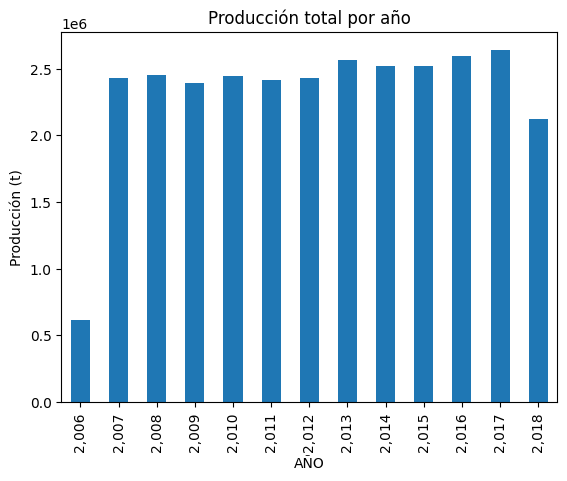

In [ ]:
# 1. Producción total por año
produccion_por_año = df.groupby('AÑO')['Producción (t)'].sum()
produccion_por_año.plot(kind='bar')
plt.title('Producción total por año')
plt.ylabel('Producción (t)')
plt.show()

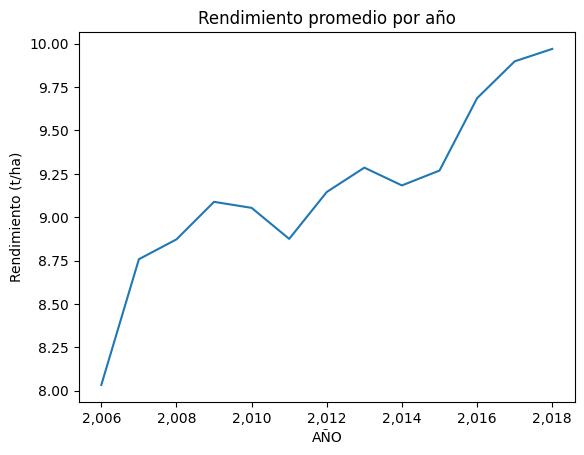

In [ ]:
# 2. Rendimiento promedio (t/ha) por año
rendimiento_por_año = df.groupby('AÑO')['Rendimiento (t/ha)'].mean()
rendimiento_por_año.plot(kind='line')
plt.title('Rendimiento promedio por año')
plt.ylabel('Rendimiento (t/ha)')
plt.show()


<ipython-input-5-b0db68a1cc59>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  area_por_departamento = df.groupby('DEPARTAMENTO')[['Área Sembrada (ha)', 'Área Cosechada (ha)']].sum()


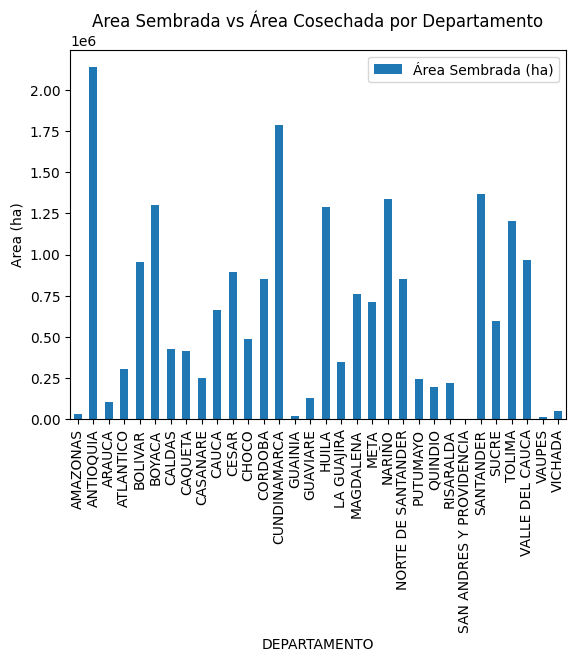

In [ ]:
# 3. Comparación de área sembrada versus área cosechada por departamento
area_por_departamento = df.groupby('DEPARTAMENTO')[['Área Sembrada (ha)', 'Área Cosechada (ha)']].sum()
area_por_departamento.plot(kind='bar', stacked=True)
plt.title('Area Sembrada vs Área Cosechada por Departamento')
plt.ylabel('Area (ha)')
plt.show()

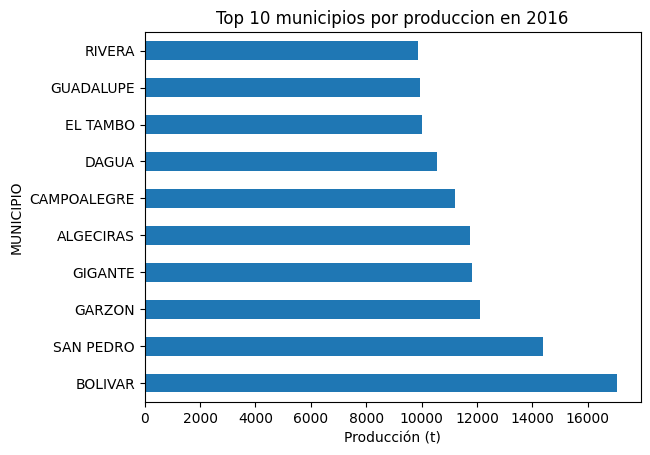

In [ ]:
if not df[df['AÑO'] == '2,016'].empty:
    top_municipios = df[df['AÑO'] == "2,016"].groupby('MUNICIPIO')['Producción (t)'].sum().nlargest(10)
    top_municipios.plot(kind='barh')
    plt.title('Top 10 municipios por produccion en 2016')
    plt.xlabel('Producción (t)')
    plt.show()
else:
    print("No data available for the year 2016.")

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!